# Examining GFF

In [6]:
import pprint
from BCBio.GFF import GFFExaminer
from BCBio import GFF

in_file = "../data/tmp.gtf"
examiner = GFFExaminer()
in_handle = open(in_file)
pprint.pprint(examiner.available_limits(in_handle))
in_handle.close()

{'gff_id': {('1',): 9, ('10',): 259, ('13',): 875, ('15',): 201, ('19',): 8},
 'gff_source': {('ensembl',): 97, ('ensembl_havana',): 519, ('havana',): 736},
 'gff_source_type': {('ensembl', 'CDS'): 41,
                     ('ensembl', 'exon'): 41,
                     ('ensembl', 'five_prime_utr'): 1,
                     ('ensembl', 'start_codon'): 4,
                     ('ensembl', 'stop_codon'): 4,
                     ('ensembl', 'three_prime_utr'): 2,
                     ('ensembl', 'transcript'): 4,
                     ('ensembl_havana', 'CDS'): 167,
                     ('ensembl_havana', 'exon'): 169,
                     ('ensembl_havana', 'five_prime_utr'): 31,
                     ('ensembl_havana', 'gene'): 29,
                     ('ensembl_havana', 'start_codon'): 31,
                     ('ensembl_havana', 'stop_codon'): 31,
                     ('ensembl_havana', 'three_prime_utr'): 30,
                     ('ensembl_havana', 'transcript'): 31,
                     (

# Extracting features of interest

Imagine we want to extract **CDS** of genes annotated by **havana**.  

**havana** is the `gff_source` and **CDS** is `gff_source_type` (`('havana', 'CDS')`) in this gtf file.    

In [70]:
gff_src = 'ensembl_havana'
limit_info = dict(gff_source=[gff_src],
                  gff_source_type = [(gff_src, 'CDS')])#, gff_source_type=['ensembl', 'CDS'])

in_handle = open(in_file)
for rec in GFF.parse(in_handle):#, limit_info= limit_info):
    pprint.pprint(rec)
    

in_handle.close()

SeqRecord(seq=Seq(None, length=90881749), id='1', name='<unknown name>', description='<unknown description>', dbxrefs=[])
SeqRecord(seq=Seq(None, length=49664862), id='10', name='<unknown name>', description='<unknown description>', dbxrefs=[])
SeqRecord(seq=Seq(None, length=28335594), id='13', name='<unknown name>', description='<unknown description>', dbxrefs=[])
SeqRecord(seq=Seq(None, length=10349266), id='15', name='<unknown name>', description='<unknown description>', dbxrefs=[])
SeqRecord(seq=Seq(None, length=60456742), id='19', name='<unknown name>', description='<unknown description>', dbxrefs=[])
<generator object parse at 0x10ed20f20>


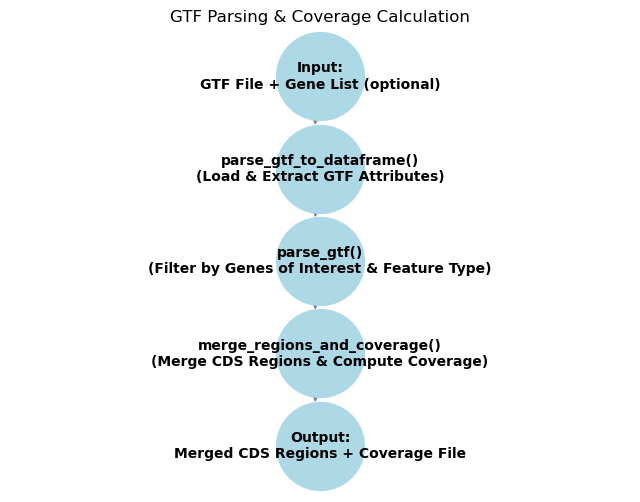

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
# Define simplified steps in the script as nodes

steps = [
    "Input:\nGTF File + Gene List (optional)", 
    "parse_gtf_to_dataframe()\n(Load & Extract GTF Attributes)", 
    "parse_gtf()\n(Filter by Genes of Interest & Feature Type)", 
    "merge_regions_and_coverage()\n(Merge CDS Regions & Compute Coverage)", 
    "Output:\nMerged CDS Regions + Coverage File"
]

# Define edges to show the simplified process flow
edges = [
    (steps[0], steps[1]),
    (steps[1], steps[2]),
    (steps[2], steps[3]),
    (steps[3], steps[4])
]

# Create a directed graph
G = nx.DiGraph()
G.add_edges_from(edges)

# Set positions for nodes in a top-down layout
pos = {
    steps[0]: (0, 4),
    steps[1]: (0, 3),
    steps[2]: (0, 2),
    steps[3]: (0, 1),
    steps[4]: (0, 0)
}

# Draw the graph
plt.figure(figsize=(8, 6))
ax = plt.gca()
ax.set_xlim(-1, 1)  # Centering the flowchart horizontally
ax.set_ylim(-0.5, 4.5)  # Adjusting vertical range


nx.draw(G, pos, with_labels=True, node_size=4000, node_color="lightblue", edge_color="gray", 
        font_size=10, font_weight="bold", arrows=True, connectionstyle="arc3,rad=0.1")

# Display the simplified flowchart
plt.title("GTF Parsing & Coverage Calculation", fontsize=12)

plt.savefig("../doc/flowchart_extract_features.png")
plt.show()


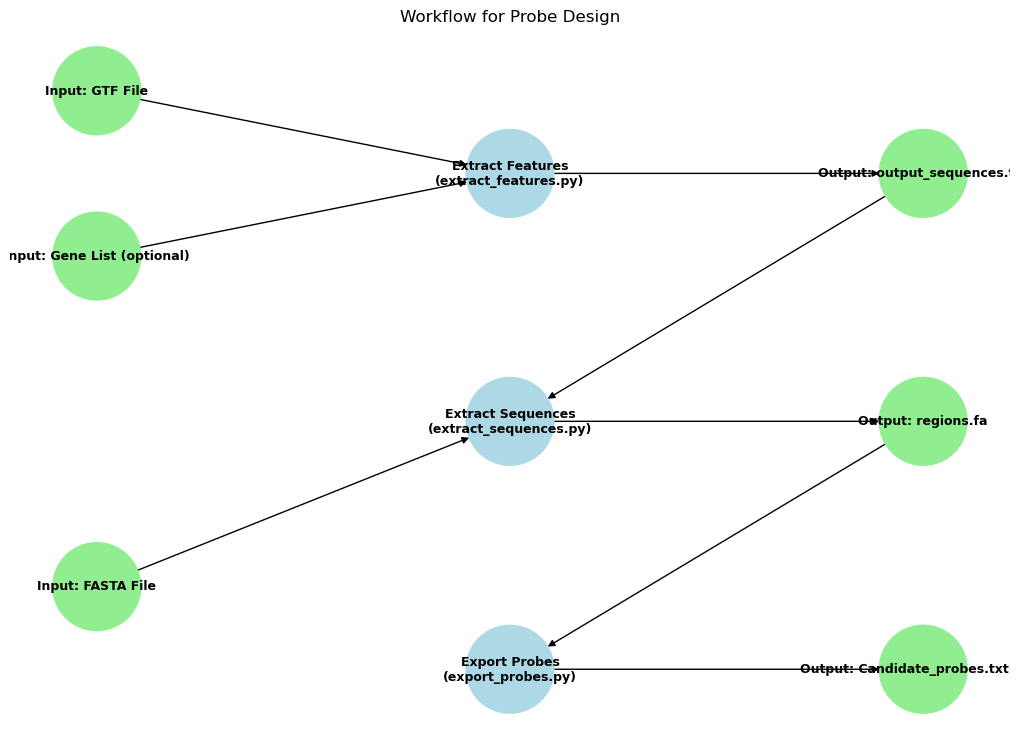

In [6]:
import matplotlib.pyplot as plt
import networkx as nx

# Initialize directed graph
G = nx.DiGraph()

# Nodes for scripts
scripts = {
    "extract_features": "Extract Features\n(extract_features.py)",
    "extract_sequences": "Extract Sequences\n(extract_sequences.py)",
    "export_probes": "Export Probes\n(export_probes.py)",
}

# Nodes for inputs/outputs
data = {
    "gtf_input": "Input: GTF File",
    "fasta_input": "Input: FASTA File",
    "gene_list_input": "Input: Gene List (optional)",
    "output_sequences": "Output: output_sequences.txt",
    "regions_fa": "Output: regions.fa",
    "candidate_probes": "Output: Candidate_probes.txt & .fa"
}

# Add nodes
for node in scripts.values():
    G.add_node(node, color='lightblue', shape='circle')
for node in data.values():
    G.add_node(node, color='lightgreen', shape='rect')

# Add edges (flow of data)
G.add_edge(data["gtf_input"], scripts["extract_features"])
G.add_edge(data["gene_list_input"], scripts["extract_features"])
G.add_edge(scripts["extract_features"], data["output_sequences"])
G.add_edge(data["output_sequences"], scripts["extract_sequences"])
G.add_edge(data["fasta_input"], scripts["extract_sequences"])
G.add_edge(scripts["extract_sequences"], data["regions_fa"])
G.add_edge(data["regions_fa"], scripts["export_probes"])
G.add_edge(scripts["export_probes"], data["candidate_probes"])

# Define positions
pos = {
    data["gtf_input"]: (-2, 2),
    data["gene_list_input"]: (-2, 1),
    scripts["extract_features"]: (0, 1.5),
    data["output_sequences"]: (2, 1.5),
    scripts["extract_sequences"]: (0, 0),
    data["fasta_input"]: (-2, -1),
    data["regions_fa"]: (2, 0),
    scripts["export_probes"]: (0, -1.5),
    data["candidate_probes"]: (2, -1.5),
}

# Draw the graph
plt.figure(figsize=(10, 7))
colors = ['lightblue' if node in scripts.values() else 'lightgreen' for node in G.nodes()]
shapes = ['o' if node in scripts.values() else 's' for node in G.nodes()]

nx.draw(G, pos, with_labels=True, node_size=4000, node_color=colors, font_size=9, font_weight="bold", arrows=True)
plt.title("Workflow for Probe Design")
plt.savefig("workflow_probe_design.png")
plt.show()


In [49]:
def parse_gtf_to_dataframe(gtf_path: str) -> pd.DataFrame:
    """
    Parses a GTF (Gene Transfer Format) file into a structured Pandas DataFrame.

    Args:
        gtf_path (str): Path to the GTF file.

    Returns:
        pd.DataFrame: A DataFrame containing parsed GTF data.
    
    Reference:
        Adapted from Ricardo Filipe dos Santos script:
        https://gist.github.com/rf-santos/22f521c62ca2f85ac9582bf0d91e4054
    """
    print('Loading GTF file....')
    # Define column names
    col_names = [
        'seqname', 'source', 'feature', 'start', 'end', 'score', 
        'strand', 'frame', 'attribute'
    ]
    
    # Read the GTF file, skipping comments
    df = pd.read_csv(gtf_path, sep='\t', header=None, names=col_names, comment='#', dtype={'score': str})

    # Define attributes to extract
    attributes = [
        'gene_id', 'transcript_id', 'exon_number', 'gene_name', 'gene_source', 
        'gene_biotype', 'transcript_name', 'transcript_source', 'transcript_biotype', 
        'protein_id', 'exon_id', 'tag'
    ]

    # Create regex patterns for attribute extraction
    attr_patterns = {attr: rf'{attr} "([^"]*)"' for attr in attributes}

    # Extract attributes using vectorized operations
    for attr, pattern in attr_patterns.items():
        df[attr] = df['attribute'].str.extract(pattern)

    # Drop the original attribute column
    df.drop(columns=['attribute'], inplace=True)

    return df

In [56]:
import pandas as pd
from Bio import SeqIO


gtf_df = parse_gtf_to_dataframe('../data/tmp.gtf')

feature_dict = dict(zip(
        gtf_df['seqname'].astype(str) + ":" + gtf_df['start'].astype(str) + "-" + gtf_df['end'].astype(str),
        zip(gtf_df['gene_name'], gtf_df['strand'])  # Store (gene_name, strand)
    ))

for region, record in seq_dict.items():
        gene_name, strand = feature_dict.get(region, ("UNKNOWN", "+"))  # Default: unknown gene, positive strand
        sequence = record.seq
        print(f"Region: {region}, Gene: {gene_name}, Strand: {strand}, Sequence: {sequence}")

Loading GTF file....
Region: 10:48977207-48977368, Gene: Grik2, Strand: -, Sequence: TGCCATGGTTTCTTTACCTGGCAACCTTCTGTCGTTAAATGTGTGCATGTTGATAACTTCTTCTGTTTTCACAATAACTGGGGCCTGTGGCTTATGTTTGAGCCGACGCTGGCACTTCAGAGACATTCTCAGTTCTTCCACCATGGCGCTACAGAAGGACCT
Region: 10:48979628-48979744, Gene: Grik2, Strand: -, Sequence: ACAACATGATGATAATGATGATGAAGATGGTGATGATGACAACACGGTAGAAATGGAAAAATCTGATTCCAAAAGGGGAAGGAATACATTGTCTTGAGGTAAGATAGTCTTGACTTT
Region: 10:48989466-48989716, Gene: Grik2, Strand: -, Sequence: CTTTTCCAATTGAGCGTTTTTTTTGGATTTGTATAAAAACTCTCCCACTGCCACAAAAACTGAGAGCACCAAGCCGGCTGCCAGGACAATGAAGATACCACCAATATTCTGCACCCCTAGAGCACTGGCCTCTTTGCTCTCCTCCTCTGGGCAGCCATTGCCTCGCCACCACTTCTCCTTCATCATGTGCAGCTTGCCTTCCTCCTGCAGCTGAAGAATGGCTATGGTGATTTTGTCTCGATATGGAGAAC
Region: 10:49008775-49009000, Gene: Grik2, Strand: -, Sequence: CCATGGGAGTGCCAACACCATAGCCTTTGGAGTCTATAAGGCCACCAATCTGCGTGAGGTTACAGTTCCGCTGGGTAACAAACTCGATGGTCGTTGACTCCATTAAGAAAGCATAATCGGAGGTGAGGACACGTTGAATCCCTTCCTCATTGCTTTTGACAAGCACAGACTGTCTCCTGCTGCTCATAAA

In [167]:
def select_top_probes(df, num_probes):
    """
    Selects the top `num_probes` based on:
    1. Highest coverage
    2. Preferred ligation junctions first, then neutral
    """
    # Sort the dataframe: Highest coverage first, then ligation junction order
    df_sorted = df.sort_values(by=["Coverage", "Ligation junction"], 
                               ascending=[False, True], 
                               key=lambda col: col.map({'preferred': 0, 'neutral': 1, 'non-preferred': 2}).fillna(3))

    # Select top `num_probes`
    final_df = df_sorted.head(num_probes)
    
    return final_df

final_df = select_top_probes(pd.read_csv('My_Candidate.txt', sep = '\t'), 10)
final_df

,Gene,Region,Sequence,GC,Ligation junction,Coverage
2,Grik2,10:55-84,GTGCCAGCGTCGGCTCAAACATAAGCCACA,56.666667,preferred,2.0
8,Grik2,10:62-91,CGTCGGCTCAAACATAAGCCACAGGCCCCA,60.000000,preferred,2.0
9,Grik2,10:63-92,GTCGGCTCAAACATAAGCCACAGGCCCCAG,60.000000,preferred,2.0
12,Grik2,10:99-128,CAATGGCTGCCCAGAGGAGGAGAGCAAAGA,56.666667,preferred,6.0
13,Grik2,10:100-129,AATGGCTGCCCAGAGGAGGAGAGCAAAGAG,56.666667,preferred,6.0
16,Grik2,10:111-140,AGAGGAGGAGAGCAAAGAGGCCAGTGCTCT,56.666667,preferred,6.0
18,Grik2,10:114-143,GGAGGAGAGCAAAGAGGCCAGTGCTCTAGG,60.000000,preferred,6.0
28,Grik2,10:182-211,CCGGCTTGGTGCTCTCAGTTTTTGTGGCAG,56.666667,preferred,6.0
29,Grik2,10:87-116,GAGGAAGGGATTCAACGTGTCCTCACCTCC,56.666667,preferred,6.0
35,Grik2,10:13-42,TGAGCTCATGCCCAAAGCACTCTCCACCAG,56.666667,preferred,6.0


In [4]:
keys = 'Grik2|10:49295764-49295871'
gene, region = keys.split("|")
chr_name, start_end = region.split(":")
int(start_end.split("-")[0])

49295764